# Actividad evaluada 4

Agustín Urrutia

### Setup

In [1]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pyvis.network import Network
import numpy as np

## Datos

Vamos a continuar trabajando con los datos de cora. El código para cargar es el mismo que el de la Actividad 11.

In [3]:
!gdown 1BcKpCXby-UUFzNUwkqI07Cjhqq_6zFyb
!unzip cora.zip

Downloading...
From: https://drive.google.com/uc?id=1BcKpCXby-UUFzNUwkqI07Cjhqq_6zFyb
To: /content/cora.zip
100% 166k/166k [00:00<00:00, 17.4MB/s]
Archive:  cora.zip
   creating: cora/
  inflating: __MACOSX/._cora         
  inflating: cora/cora.content       
  inflating: __MACOSX/cora/._cora.content  
  inflating: cora/README             
  inflating: __MACOSX/cora/._README  
  inflating: cora/cora.cites         
  inflating: __MACOSX/cora/._cora.cites  


In [4]:
### Información de las aristas del grafo de cora

citas = pd.read_csv('cora/cora.cites',sep="\t",
    header=None,
    names=["target", "source"])

### Metemos esto a networkx

G = nx.from_pandas_edgelist(citas, source="source", target="target",create_using=nx.DiGraph())

### Ahora levantamos la información de cada paper. Solo vamos a usar el "subject"

### Información de los nodos de cora

column_names = ["paper_id"] + [f"word_{idx}" for idx in range(1433)] + ["subject"]
papers = pd.read_csv(
    'cora/cora.content', sep="\t", names=column_names,
)
subjects = papers[["paper_id","subject"]]

### Agregamos la información a nuestro grafo G de esta forma:

subjects_dict = dict(zip(subjects['paper_id'], subjects['subject']))
nx.set_node_attributes(G, subjects_dict, 'subject')

In [98]:
citas.head()

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


In [97]:
subjects.head()

,paper_id,subject
0,31336,Neural_Networks
1,1061127,Rule_Learning
2,1106406,Reinforcement_Learning
3,13195,Reinforcement_Learning
4,37879,Probabilistic_Methods


Y recordemos como se veía esto

<ipython-input-5-14c3a4b33f4c>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(unique_subjects))


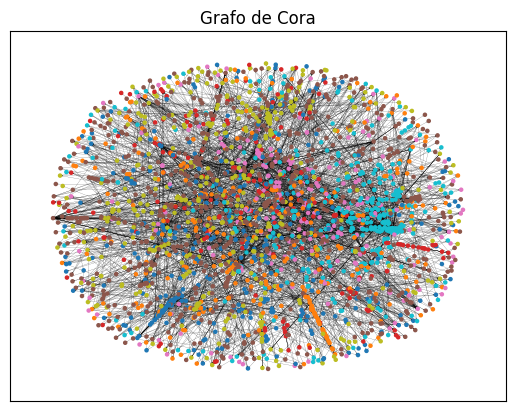

In [5]:
pos = nx.spring_layout(G)  # Layout algorithm for node positioning

# Assign a different color for each subject
unique_subjects = set(nx.get_node_attributes(G, 'subject').values())
cmap = cm.get_cmap('tab10', len(unique_subjects))
node_colors = [cmap(list(unique_subjects).index(G.nodes[node]['subject'])) for node in G.nodes]

# Draw the nodes with colors based on the 'category' attribute
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=5)

# Draw the edges
nx.draw_networkx_edges(G, pos, width=0.1, arrowsize=1,node_size=5)

# Draw node labels if desired
# nx.draw_networkx_labels(G, pos)

# Adjust the plot aesthetics
plt.title('Grafo de Cora')
#plt.axis('off')

# Display the graph
plt.show()

## Comunidades

Para describir el algoritmo de detección de comunidades que vamos a usar, primero extendemos nuestra noción de betweenes centrality a aristas, de la siguiente forma. Para una arista $e$, sea $C_{u,v}$ la cantidad de caminos mas cortos entre $u$ y $v$, y $C_{u,v}(e)$ la cantidad de caminos más cortos entre $u$ y $v$ que usan $e$.

La centralidad de e se define entonces como:
$$\sum_{u \neq v \in G, \text{$u$ y $v$ conectados}} \frac{C_{u,v}(e)}{C_{u,v}}$$

### Algoritmo de detección de comunidades de Girvan–Newman

El algoritmo (según su implementación en Networkx) funciona de la siguiente forma.

- 1: Calcular cuantas componentes conexas tiene el grafo.
- 2: Mientras no se generen nuevas componentes conexas:
    - Calcular la arista con mayor betweenes centrality
    - Remover esa arista del grafo
- 3: Cada componente conexa es una comunidad


#### Ejemplo código

Acá va un código en el que llamamos a esta implementación, y analizamos cada comunidad en términos del porcentaje de papers de cada uno de los subjects en esa comunidad.

In [ ]:
communities = nx.community.girvan_newman(G)

num_communities = 0
print("Detected communities:")
for community in next(communities):
    num_communities += 1
    subjects = [G.nodes[node]['subject'] for node in community]

    df = pd.DataFrame(subjects, columns=['subject'])
    subject_percentages = df['subject'].value_counts(normalize=True) * 100

    print("Community:", community)
    for subject, percentage in subject_percentages.items():
        print("Subject:", subject, "Percentage:", percentage)
    print()
print("Total number of communities:",num_communities)

Detected communities:
Community: {1122304, 1155073, 851968, 1114118, 1105932, 1114125, 253971, 8213, 696342, 696343, 696345, 696346, 8224, 950305, 262178, 35, 630817, 40, 1114153, 1130539, 385067, 131117, 131122, 16437, 188471, 16451, 1138755, 1130567, 1130568, 1114184, 16461, 1114192, 16470, 16471, 155736, 16474, 1130586, 16476, 155738, 106590, 573535, 589923, 16485, 1130600, 32872, 630890, 1114222, 573553, 65650, 114, 65653, 117, 221302, 270456, 1122425, 1114239, 128, 130, 1106052, 1130634, 1130637, 647315, 180373, 1122460, 1130653, 1130657, 164, 82087, 82090, 180399, 82098, 1130676, 1130678, 1106103, 1130680, 1106112, 590022, 1114331, 1114336, 385251, 631015, 688361, 647408, 1114352, 131315, 647413, 33013, 131318, 131317, 1106172, 1114364, 213246, 41216, 229635, 270600, 631052, 1122574, 606479, 1114388, 1122580, 647447, 1138968, 1138970, 139547, 1130780, 1114398, 213279, 288, 1130808, 1106236, 672064, 672070, 672071, 1114442, 49482, 1122642, 1130847, 90470, 1130856, 1106287, 1106298

Comparemos con las comunidades originales, dadas por las componentas conexas del grafo.
¿Puedes ver qué componente nueva genero el algoritmo de Girvan–Newman?

# Actividad Evaluada

### **Parte 1.**

Acá vas a programar un algoritmo que trabaje usando Girvan–Newman como subrutina. Específicamente, deberás continuar iterando el resultado a las llamadas a Girvan-Newman, volviendo a aplicar el algoritmo sobre los subgrafos inducidos por todas las comunidades donde no exista un subject que tenga una representación *mayor o igual* a 50% (es decir, en donde la mitad o más de los papers tienen el mismo subject).

¿Cuántas comunidades encontraste?


In [ ]:
communities = nx.community.girvan_newman(G)

In [ ]:
def print_community(community, subject_percentages):
    print("Community:", community)
    for subject, percentage in subject_percentages.items():
        print("Subject:", subject, "Percentage:", percentage)
    print()

def check_community(community_generator, deep:int = 0):

    print("Detected communities:")
    print(f"Deep: {deep}")

    communities_counter = 0
    for community in next(community_generator):

        print(f"set size: {len(community)}")

        subjects = [G.nodes[node]['subject'] for node in community]
        df = pd.DataFrame(subjects, columns=['subject'])

        subject_percentages = df['subject'].value_counts(normalize=True) * 100

        if any(value > 50 for value in subject_percentages.values):
            print_community(community, subject_percentages)
            communities_counter += 1
            continue

        print(f"Calculating subgraph community")
        subgraph = G.subgraph(community)
        sub_communities = nx.community.girvan_newman(subgraph)
        communities_counter += check_community(sub_communities, deep + 1)

    print(f"Total number of communities in deep {deep}:",communities_counter)
    return communities_counter

communities = nx.community.girvan_newman(G)
check_community(communities)


Detected communities:
Deep: 0
Calculating subgraph community
Detected communities:
Deep: 1
Calculating subgraph community
Detected communities:
Deep: 2
Calculating subgraph community
Detected communities:
Deep: 3
Community: {593921, 1128453, 1112075, 141324, 253971, 634902, 593942, 634904, 141342, 35, 141347, 608292, 40, 1153065, 987188, 84021, 127033, 634938, 503871, 503877, 608326, 735303, 503883, 735311, 503893, 561238, 1103960, 118873, 594011, 634975, 1103985, 594039, 594047, 643199, 1114239, 647315, 18582, 1136791, 1136814, 1120431, 397488, 28851, 1106103, 1132731, 6346, 1114331, 190697, 190698, 647408, 190706, 35061, 647413, 1153280, 229635, 12558, 606479, 1134865, 647447, 12576, 575795, 219446, 59715, 1114442, 86359, 63832, 1130847, 1130856, 1112426, 1106298, 1120643, 98693, 1114502, 98698, 168332, 18833, 801170, 18834, 94639, 94641, 606647, 467383, 197054, 459206, 307656, 459213, 459214, 463, 459216, 594387, 377303, 694759, 1128943, 1128945, 1128946, 1110515, 1133047, 1128959, 

130

Lo importante, el total de comunidades es **130**. Dejaré una copia del output en la siguiente subsección para que se vea más ordenado.

#### Output parte 1

```
Detected communities:
Deep: 0
Calculating subgraph community
Detected communities:
Deep: 1
Calculating subgraph community
Detected communities:
Deep: 2
Calculating subgraph community
Detected communities:
Deep: 3
Community: {593921, 1128453, 1112075, 141324, 253971, 634902, 593942, 634904, 141342, 35, 141347, 608292, 40, 1153065, 987188, 84021, 127033, 634938, 503871, 503877, 608326, 735303, 503883, 735311, 503893, 561238, 1103960, 118873, 594011, 634975, 1103985, 594039, 594047, 643199, 1114239, 647315, 18582, 1136791, 1136814, 1120431, 397488, 28851, 1106103, 1132731, 6346, 1114331, 190697, 190698, 647408, 190706, 35061, 647413, 1153280, 229635, 12558, 606479, 1134865, 647447, 12576, 575795, 219446, 59715, 1114442, 86359, 63832, 1130847, 1130856, 1112426, 1106298, 1120643, 98693, 1114502, 98698, 168332, 18833, 801170, 18834, 94639, 94641, 606647, 467383, 197054, 459206, 307656, 459213, 459214, 463, 459216, 594387, 377303, 694759, 1128943, 1128945, 1128946, 1110515, 1133047, 1128959, 573964, 1128974, 1128975, 1128977, 1110546, 1128978, 1128982, 1128985, 573978, 178718, 45599, 45603, 45605, 1128997, 178727, 1153577, 39474, 1129015, 574009, 1129018, 1129027, 117316, 117315, 100935, 787016, 96845, 594511, 96851, 19045, 248425, 1131116, 594543, 248431, 1133196, 8865, 8872, 8874, 8875, 78508, 78511, 1131198, 416455, 148170, 975567, 387795, 78549, 1102550, 78552, 594649, 78555, 78557, 1125092, 41714, 1153784, 447224, 273152, 576257, 41732, 1104647, 80656, 1153816, 1133338, 1119004, 56112, 56115, 375605, 56119, 574264, 1137466, 1153853, 682815, 1153860, 1112911, 144212, 246618, 1131359, 1131360, 1153896, 1153897, 576362, 1153899, 1153900, 1071981, 1131374, 54129, 54131, 54132, 148341, 62329, 119686, 1153942, 1153943, 1129367, 1153945, 1129368, 1129369, 263069, 1133469, 152483, 254923, 594900, 82920, 265203, 289779, 289780, 289781, 66556, 574462, 46079, 1026, 66563, 66564, 1127430, 1033, 1034, 1035, 35852, 164885, 1109017, 33818, 1154076, 1131549, 1131550, 33823, 1131557, 287787, 1131565, 134199, 58436, 17477, 134219, 592973, 592975, 578645, 578646, 58453, 58454, 578649, 592986, 103515, 578650, 158812, 592993, 1129570, 592996, 1129573, 33895, 1104999, 578669, 97390, 33904, 595056, 33907, 1125492, 1107062, 1131639, 1121398, 595063, 593022, 1154176, 1129610, 240791, 175256, 1129629, 593060, 513189, 62634, 593068, 576691, 593091, 1123530, 1109199, 195792, 593105, 593104, 1129683, 576725, 595157, 1109208, 578780, 1125597, 1131752, 574710, 595193, 62718, 593155, 220420, 785678, 1119505, 576795, 578845, 1117476, 144679, 593201, 1129778, 509233, 308529, 15670, 593209, 70970, 593210, 38205, 144701, 87363, 1105221, 1129798, 263498, 1105231, 44368, 578898, 13652, 13654, 593240, 13656, 13658, 1113438, 294239, 593248, 1152358, 85352, 593260, 97645, 9586, 601462, 87417, 1127812, 56709, 58758, 56708, 1154459, 1152421, 44455, 593328, 593329, 292277, 486840, 579008, 1134022, 576973, 110041, 1107418, 1119708, 44514, 1127913, 1152508, 108047, 1103383, 568857, 128540, 206371, 579108, 390693, 650807, 1152569, 650814, 577086, 1109566, 249421, 650834, 575077, 640617, 259701, 259702, 48764, 48766, 48768, 28290, 593544, 61069, 1113742, 48781, 61073, 583318, 593559, 1688, 646809, 593560, 1694, 69284, 1152676, 69296, 28336, 646836, 646837, 132806, 577227, 22229, 1136342, 1128151, 1107674, 22241, 1152740, 1113831, 567018, 14062, 646900, 1152761, 646913, 270085, 1128198, 1128201, 1128204, 83725, 1128208, 1817, 243483, 57119, 83746, 1128227, 286500, 198443, 286513, 81714, 577331, 1115959, 81722, 116545, 395075, 307015, 116552, 116553, 177993, 182093, 182094, 177998, 231249, 575331, 1128291, 227178, 251756, 335733, 1128314, 1128319, 61312, 423816, 18313, 1120138, 593813, 575402, 1152944, 1128369, 210871, 210872, 608190, 608191, 593859, 415693, 135130, 262108, 262121, 815096}
Subject: Genetic_Algorithms Percentage: 83.92857142857143
Subject: Neural_Networks Percentage: 8.258928571428571
Subject: Reinforcement_Learning Percentage: 5.133928571428571
Subject: Case_Based Percentage: 2.0089285714285716
Subject: Theory Percentage: 0.6696428571428571

Calculating subgraph community
Detected communities:
Deep: 4
Calculating subgraph community
Detected communities:
Deep: 5
Calculating subgraph community
Detected communities:
Deep: 6
Community: {1122304, 1114118, 675847, 399370, 628751, 94229, 260121, 628764, 628766, 950305, 1114153, 12330, 632874, 131117, 12337, 16437, 1050679, 12347, 63549, 16451, 12359, 1130568, 948299, 16461, 96335, 1114192, 1108050, 16470, 16471, 16474, 1130586, 16476, 6238, 30817, 16485, 632935, 256106, 340075, 1103979, 630890, 340078, 350319, 270456, 1118332, 307336, 1118347, 180373, 628888, 264347, 1122460, 151708, 1153183, 82087, 82090, 1153195, 30895, 1116336, 180399, 82098, 346292, 1130678, 239800, 1106112, 1108169, 75983, 258259, 71904, 26850, 631015, 688361, 4330, 4335, 1114352, 1108209, 131315, 131317, 131318, 633081, 430329, 1114364, 41216, 129287, 631052, 1122574, 1114388, 139547, 395547, 162075, 141596, 39199, 162080, 395553, 1130780, 213279, 135464, 39210, 1112369, 22835, 626999, 143676, 289085, 672064, 289088, 31043, 672070, 672071, 49482, 340299, 919885, 708945, 174418, 684372, 12631, 174425, 756061, 12638, 733534, 264556, 1106287, 72056, 1132922, 739707, 18812, 59772, 18815, 1104258, 8581, 24966, 1128839, 733576, 205196, 1128846, 24974, 59798, 1116569, 147870, 1130915, 330148, 1128868, 72101, 1104300, 133550, 133553, 1116594, 20920, 143801, 133563, 133566, 133567, 1133004, 395725, 1116629, 14807, 139738, 1110494, 330208, 358884, 739816, 1135082, 84459, 1114605, 684531, 1110520, 1104379, 469504, 649730, 649731, 1135108, 35335, 1120777, 649739, 1135115, 643597, 35343, 1120786, 1135122, 102938, 102939, 1128990, 1135137, 1110563, 385572, 27174, 10793, 436796, 1104449, 428610, 907845, 1102407, 248395, 23116, 184918, 139865, 1120858, 25181, 25184, 100961, 1120866, 948846, 643695, 6775, 43639, 51831, 6784, 1118848, 2695, 2696, 1106568, 2698, 1131149, 2702, 1131150, 12946, 1112723, 643734, 1129111, 643735, 152219, 1116835, 123556, 1112767, 240321, 41666, 643777, 950986, 99025, 84695, 1125082, 1131230, 15076, 94953, 1106671, 191216, 1135345, 6898, 633585, 191222, 510715, 6910, 60159, 6913, 523010, 31489, 662279, 1135368, 90888, 60169, 60170, 1123087, 342802, 447250, 29492, 1153861, 13136, 1131345, 11093, 1135455, 1112929, 1108834, 1108841, 7022, 1114992, 260979, 1123188, 27510, 633721, 27514, 62333, 203646, 217984, 1153922, 906, 62347, 1153933, 910, 662416, 1104787, 13205, 23448, 13208, 13212, 13213, 91038, 119712, 1119140, 641956, 1123239, 684972, 123825, 641976, 684986, 160705, 127940, 1131464, 562123, 242637, 23502, 119761, 62417, 17363, 35797, 1110998, 39904, 949217, 1129443, 400356, 1135589, 285675, 179180, 943087, 654326, 285687, 1154042, 168958, 689152, 654339, 29708, 1154068, 144408, 31769, 1117219, 648232, 662572, 107569, 1154103, 103482, 74821, 949318, 5194, 1154123, 1154124, 400473, 762980, 25702, 431206, 7272, 928873, 7276, 1131634, 1105011, 1154169, 853114, 853115, 853116, 853118, 1131647, 7296, 7297, 763010, 763009, 1152143, 646289, 78994, 119956, 1129621, 1152150, 289945, 3229, 853150, 853155, 1117348, 19621, 1105062, 42156, 50354, 1152179, 58552, 40124, 40125, 1109185, 335042, 1152194, 40131, 416964, 734406, 40135, 1111240, 1154251, 50381, 1237, 171225, 1131741, 1111265, 1131748, 5348, 1154276, 19697, 66805, 1123576, 66809, 1105148, 949511, 120084, 1152277, 140569, 1031453, 52515, 687401, 763181, 156977, 1117501, 169279, 124224, 169280, 118079, 1140040, 85324, 32083, 1365, 5462, 9581, 93555, 284023, 284025, 411005, 193918, 884094, 105856, 263553, 1127810, 509315, 46468, 210309, 105865, 226698, 755082, 193932, 193931, 753047, 163235, 48550, 66982, 66986, 48555, 66990, 753070, 1107385, 175548, 1105344, 1113541, 214472, 1121739, 703953, 1117653, 95718, 95719, 1152490, 24043, 1136110, 1125895, 34315, 32276, 1105433, 273949, 671269, 245288, 267824, 34355, 1132083, 13885, 671293, 1140289, 243274, 69198, 636500, 427606, 636511, 1107558, 753264, 753265, 1105530, 738941, 40583, 255628, 1115790, 233106, 1126037, 1123991, 118424, 1126044, 40605, 1152673, 118435, 118436, 67245, 67246, 194223, 102061, 1717, 1136310, 1111733, 65212, 370366, 1105603, 1152714, 157401, 67292, 567005, 28385, 1113828, 390889, 5869, 145134, 1136393, 390922, 1136397, 69392, 767763, 145176, 202520, 202522, 231198, 118559, 444191, 118558, 950052, 1136422, 560936, 69418, 1120049, 1152821, 1136442, 1120059, 1136446, 1140543, 1136447, 1118017, 1136449, 675649, 446271, 1140548, 1109830, 1140547, 253762, 1120084, 911198, 42847, 42848, 100197, 141160, 1109873, 83826, 1130356, 1132418, 1118083, 1109891, 83847, 1113995, 202639, 1132434, 1152917, 1132443, 124828, 188318, 92065, 1118120, 1111978, 1132459, 75691, 1132461, 675756, 75695, 32688, 237489, 75693, 948147, 75694, 737204, 200630, 32698, 1152958, 1152959, 126912, 1120197, 1120211, 227286, 1132505, 632796, 815073, 131042, 733167, 120817, 6130, 12275, 917493, 1136631, 1136634, 1120252}
Subject: Neural_Networks Percentage: 78.4013605442177
Subject: Probabilistic_Methods Percentage: 10.034013605442176
Subject: Theory Percentage: 5.612244897959184
Subject: Reinforcement_Learning Percentage: 3.061224489795918
Subject: Genetic_Algorithms Percentage: 2.7210884353741496
Subject: Case_Based Percentage: 0.17006802721088435

Calculating subgraph community
Detected communities:
Deep: 7
Calculating subgraph community
Detected communities:
Deep: 8
Calculating subgraph community
Detected communities:
Deep: 9
Calculating subgraph community
Detected communities:
Deep: 10
Calculating subgraph community
Detected communities:
Deep: 11
Calculating subgraph community
Detected communities:
Deep: 12
Calculating subgraph community
Detected communities:
Deep: 13
Calculating subgraph community
Detected communities:
Deep: 14
Calculating subgraph community
Detected communities:
Deep: 15
Calculating subgraph community
Detected communities:
Deep: 16
Community: {1155073, 1110531, 64519, 238099, 1115670, 155158, 154134, 8224, 1153064, 4649, 1130539, 10796, 10798, 217139, 11325, 136766, 136767, 136768, 1125953, 137790, 11335, 11337, 1000012, 11342, 1128531, 389715, 135765, 135766, 6741, 1117786, 360028, 27230, 97892, 1126503, 1118823, 55403, 37483, 37998, 38000, 51834, 1153148, 372862, 1130637, 3217, 3218, 50838, 1107095, 3236, 137380, 37541, 591016, 591017, 49843, 49844, 49847, 18615, 85688, 23738, 25794, 1127619, 582343, 128202, 128203, 72908, 582349, 94416, 66782, 93923, 140005, 1153254, 49895, 1127657, 318187, 1153264, 107251, 107252, 167670, 1272, 417017, 1116922, 267003, 562940, 1786, 1135358, 35070, 1113852, 6917, 1061127, 6923, 348437, 397590, 6935, 520471, 1123093, 6939, 101660, 6941, 101662, 1102625, 1152290, 308003, 212777, 252715, 449841, 2354, 86840, 1128256, 5959, 1153866, 1106764, 5966, 20821, 63835, 545647, 582511, 75121, 20857, 31097, 1107325, 151430, 2440, 1120650, 13717, 1128856, 1110426, 46491, 22431, 1120169, 1127851, 63915, 434, 101811, 62389, 1127863, 63931, 10174, 1154500, 46536, 85449, 10186, 954315, 85452, 46547, 1106388, 411092, 601561, 187354, 143323, 601567, 1105887, 61417, 9708, 6639, 133615, 8687, 1128437, 23545, 23546, 74749}
Subject: Rule_Learning Percentage: 50.943396226415096
Subject: Theory Percentage: 27.67295597484277
Subject: Case_Based Percentage: 13.836477987421384
Subject: Neural_Networks Percentage: 4.40251572327044
Subject: Reinforcement_Learning Percentage: 1.257861635220126
Subject: Probabilistic_Methods Percentage: 1.257861635220126
Subject: Genetic_Algorithms Percentage: 0.628930817610063

Calculating subgraph community
Detected communities:
Deep: 17
Calculating subgraph community
Detected communities:
Deep: 18
Calculating subgraph community
Detected communities:
Deep: 19
Calculating subgraph community
Detected communities:
Deep: 20
Community: {51909, 502574, 1105428, 173884, 8703}
Subject: Rule_Learning Percentage: 60.0
Subject: Case_Based Percentage: 20.0
Subject: Probabilistic_Methods Percentage: 20.0

Community: {59244, 89335}
Subject: Case_Based Percentage: 100.0

Total number of communities in deep 20: 2
Calculating subgraph community
Detected communities:
Deep: 20
Community: {308232}
Subject: Rule_Learning Percentage: 100.0

Calculating subgraph community
Detected communities:
Deep: 21
Community: {1112026}
Subject: Neural_Networks Percentage: 100.0

Community: {27535}
Subject: Probabilistic_Methods Percentage: 100.0

Total number of communities in deep 21: 2
Total number of communities in deep 20: 3
Total number of communities in deep 19: 5
Calculating subgraph community
Detected communities:
Deep: 19
Calculating subgraph community
Detected communities:
Deep: 20
Community: {34961}
Subject: Neural_Networks Percentage: 100.0

Community: {51866, 22883, 51879}
Subject: Theory Percentage: 66.66666666666666
Subject: Probabilistic_Methods Percentage: 33.33333333333333

Total number of communities in deep 20: 2
Community: {1114664, 4274, 1119078}
Subject: Case_Based Percentage: 66.66666666666666
Subject: Theory Percentage: 33.33333333333333

Total number of communities in deep 19: 3
Total number of communities in deep 18: 8
Community: {104840, 8696, 8699, 1102751}
Subject: Theory Percentage: 100.0

Total number of communities in deep 17: 9
Total number of communities in deep 16: 10
Calculating subgraph community
Detected communities:
Deep: 16
Calculating subgraph community
Detected communities:
Deep: 17
Calculating subgraph community
Detected communities:
Deep: 18
Calculating subgraph community
Detected communities:
Deep: 19
Community: {1107136, 17811}
Subject: Genetic_Algorithms Percentage: 100.0

Community: {144330, 83461, 63486}
Subject: Theory Percentage: 66.66666666666666
Subject: Rule_Learning Percentage: 33.33333333333333

Total number of communities in deep 19: 2
Calculating subgraph community
Detected communities:
Deep: 19
Calculating subgraph community
Detected communities:
Deep: 20
Calculating subgraph community
Detected communities:
Deep: 21
Calculating subgraph community
Detected communities:
Deep: 22
Calculating subgraph community
Detected communities:
Deep: 23
Calculating subgraph community
Detected communities:
Deep: 24
Calculating subgraph community
Detected communities:
Deep: 25
Community: {1152448, 36162, 1153703, 1152975, 68463, 1153169, 1152307, 40151, 6334}
Subject: Case_Based Percentage: 55.55555555555556
Subject: Rule_Learning Percentage: 22.22222222222222
Subject: Probabilistic_Methods Percentage: 11.11111111111111
Subject: Theory Percentage: 11.11111111111111

Community: {444240}
Subject: Genetic_Algorithms Percentage: 100.0

Total number of communities in deep 25: 2
Community: {1104261}
Subject: Theory Percentage: 100.0

Total number of communities in deep 24: 3
Community: {1132815}
Subject: Neural_Networks Percentage: 100.0

Total number of communities in deep 23: 4
Community: {199571, 46431}
Subject: Neural_Networks Percentage: 100.0

Total number of communities in deep 22: 5
Calculating subgraph community
Detected communities:
Deep: 22
Community: {20528}
Subject: Case_Based Percentage: 100.0

Community: {1103676}
Subject: Neural_Networks Percentage: 100.0

Total number of communities in deep 22: 2
Total number of communities in deep 21: 7
Calculating subgraph community
Detected communities:
Deep: 21
Community: {60682, 552469, 158614, 1106330, 1123867, 3231, 3232, 66594, 711598, 328370, 259126, 10169, 636098, 1113926, 250566, 20942, 1128536, 39131, 263279, 20850, 63477, 1107067, 49660}
Subject: Theory Percentage: 56.52173913043478
Subject: Case_Based Percentage: 26.08695652173913
Subject: Neural_Networks Percentage: 13.043478260869565
Subject: Genetic_Algorithms Percentage: 4.3478260869565215

Calculating subgraph community
Detected communities:
Deep: 22
Community: {1102761, 8821}
Subject: Case_Based Percentage: 100.0

Community: {66596, 362926}
Subject: Rule_Learning Percentage: 100.0

Total number of communities in deep 22: 2
Total number of communities in deep 21: 3
Total number of communities in deep 20: 10
Community: {200480, 1112665, 6344}
Subject: Case_Based Percentage: 66.66666666666666
Subject: Neural_Networks Percentage: 33.33333333333333

Total number of communities in deep 19: 11
Total number of communities in deep 18: 13
Calculating subgraph community
Detected communities:
Deep: 18
Community: {1131137, 48066, 31083, 92589, 1999, 1131471, 52847, 1153811, 39126, 7032, 118682, 31483, 1123068, 39165}
Subject: Probabilistic_Methods Percentage: 57.14285714285714
Subject: Theory Percentage: 28.57142857142857
Subject: Case_Based Percentage: 7.142857142857142
Subject: Rule_Learning Percentage: 7.142857142857142

Calculating subgraph community
Detected communities:
Deep: 19
Calculating subgraph community
Detected communities:
Deep: 20
Calculating subgraph community
Detected communities:
Deep: 21
Community: {1104769}
Subject: Probabilistic_Methods Percentage: 100.0

Calculating subgraph community
Detected communities:
Deep: 22
Community: {25772}
Subject: Neural_Networks Percentage: 100.0

Community: {1122580}
Subject: Theory Percentage: 100.0

Total number of communities in deep 22: 2
Total number of communities in deep 21: 3
Calculating subgraph community
Detected communities:
Deep: 21
Calculating subgraph community
Detected communities:
Deep: 22
Community: {116528}
Subject: Theory Percentage: 100.0

Community: {1110438}
Subject: Neural_Networks Percentage: 100.0

Total number of communities in deep 22: 2
Community: {964248, 3237}
Subject: Probabilistic_Methods Percentage: 100.0

Total number of communities in deep 21: 3
Total number of communities in deep 20: 6
Community: {97377, 211875, 33412, 3240, 211432, 124296, 34708}
Subject: Neural_Networks Percentage: 57.14285714285714
Subject: Theory Percentage: 42.857142857142854

Total number of communities in deep 19: 7
Total number of communities in deep 18: 8
Total number of communities in deep 17: 21
Calculating subgraph community
Detected communities:
Deep: 17
Calculating subgraph community
Detected communities:
Deep: 18
Community: {27530, 46476, 1105932, 277263, 1128853, 178209, 1128881, 592826, 592830, 75969, 14531, 75972, 195150, 1115471, 39127, 160732, 1128542, 1128927, 52835, 1128935, 568045, 116081, 116084, 116087}
Subject: Rule_Learning Percentage: 87.5
Subject: Neural_Networks Percentage: 8.333333333333332
Subject: Case_Based Percentage: 4.166666666666666

Calculating subgraph community
Detected communities:
Deep: 19
Community: {1106370, 424, 218666, 27531, 197452, 1135125, 27543}
Subject: Neural_Networks Percentage: 71.42857142857143
Subject: Rule_Learning Percentage: 14.285714285714285
Subject: Case_Based Percentage: 14.285714285714285

Community: {613409, 1103038, 1131745, 88356, 114189, 294030, 51934, 14545, 1116530, 1129907, 14549, 1115701, 31479, 20923, 20924, 289885, 77758}
Subject: Probabilistic_Methods Percentage: 64.70588235294117
Subject: Neural_Networks Percentage: 23.52941176470588
Subject: Case_Based Percentage: 5.88235294117647
Subject: Theory Percentage: 5.88235294117647

Total number of communities in deep 19: 2
Total number of communities in deep 18: 3
Community: {8832, 235776, 346243, 17798, 36620, 3220, 69397, 12439, 359067, 1115677, 1106849, 1132706, 22563, 1103394, 521251, 22564, 6311, 46887, 521252, 22566, 350373, 36140, 141868, 1121459, 1152308, 40886, 323128, 145215, 14529, 1120962, 10435, 239810, 6343, 6217, 1119178, 1131728, 1153106, 239829, 40922, 39130, 521183, 654177, 105057, 120039, 1125992, 20584, 56167, 1111788, 429805, 1128430, 6767, 1114864, 20592, 20593, 1119987, 27895, 112378, 28412}
Subject: Case_Based Percentage: 56.896551724137936
Subject: Neural_Networks Percentage: 20.689655172413794
Subject: Theory Percentage: 18.96551724137931
Subject: Reinforcement_Learning Percentage: 3.4482758620689653

Total number of communities in deep 17: 4
Total number of communities in deep 16: 25
Total number of communities in deep 15: 35
Community: {45061, 1119751, 166420, 1109542, 1105450, 52784, 84020, 1106492, 11326, 1108551, 11339, 1121867, 1152075, 1123926, 1125467, 2653, 2654, 27241, 1102442, 27243, 1116268, 1114222, 27249, 27250, 6771, 65653, 6782, 45188, 45189, 70281, 49811, 3222, 197783, 350362, 3233, 3235, 59045, 1116328, 107177, 1116842, 3243, 30901, 1104055, 175291, 206524, 1106630, 39124, 192734, 167656, 1103610, 1112319, 8961, 1131266, 1105672, 368431, 36145, 237376, 1133390, 31055, 272720, 192850, 18773, 1132385, 154982, 129897, 1103737, 1152379, 31105, 46470, 8079, 1107861, 976284, 854434, 1110947, 8617, 8619, 1130927, 1130929, 1130931, 1130934, 5055, 1109439, 211906, 509379, 48075, 89547, 1997, 463825, 1104851, 1133028, 44017, 45052}
Subject: Theory Percentage: 60.86956521739131
Subject: Neural_Networks Percentage: 18.478260869565215
Subject: Probabilistic_Methods Percentage: 13.043478260869565
Subject: Rule_Learning Percentage: 3.260869565217391
Subject: Case_Based Percentage: 3.260869565217391
Subject: Reinforcement_Learning Percentage: 1.0869565217391304

Total number of communities in deep 14: 36
Community: {20833, 1121057, 47682, 63812, 47683, 47684, 6318, 1108656, 1125393, 1105360, 68115, 135798}
Subject: Case_Based Percentage: 83.33333333333334
Subject: Neural_Networks Percentage: 8.333333333333332
Subject: Rule_Learning Percentage: 8.333333333333332

Total number of communities in deep 13: 37
Community: {1117184, 77826, 77829, 1125386, 3084, 129042, 33301, 129045, 33303, 3095, 3097, 3101, 1121313, 3112, 385067, 521269, 218682, 1111614, 1119295, 1153101, 1118286, 110162, 110163, 110164, 1118302, 1125993, 27246, 1132157, 1153150, 1117833, 137359, 1129106, 3223, 53942, 259772, 1022969, 10430, 1114336, 1102567, 1108728, 255233, 4878, 1107215, 54550, 70441, 70442, 1108267, 70444, 1120563, 263482, 263486, 238401, 399173, 1113934, 22869, 22874, 1111899, 22876, 22875, 337766, 1108329, 1110390, 28026, 128383, 1108363, 1114512, 1121176, 1949, 1951, 1952, 1955, 1956, 261040, 5062, 10183, 5064, 1120713, 1481, 41417, 5069, 1113551, 47570, 5075, 272345, 177115, 5600, 470511, 521207, 83449, 198653}
Subject: Case_Based Percentage: 81.11111111111111
Subject: Rule_Learning Percentage: 11.11111111111111
Subject: Theory Percentage: 4.444444444444445
Subject: Neural_Networks Percentage: 1.1111111111111112
Subject: Probabilistic_Methods Percentage: 1.1111111111111112
Subject: Genetic_Algorithms Percentage: 1.1111111111111112

Total number of communities in deep 12: 38
Community: {1118209, 249858, 102406, 1110028, 35854, 217115, 4637, 1112099, 1118764, 33325, 4660, 93755, 987197, 12350, 27199, 1102400, 157761, 1117249, 57922, 27203, 15429, 1153091, 15431, 57932, 166989, 155736, 93273, 155738, 1131611, 57948, 416867, 219239, 1107567, 1059953, 65650, 1107572, 20601, 20602, 1135746, 1104007, 1153160, 13982, 12960, 152226, 34979, 164, 152227, 18619, 4804, 1108167, 1153736, 77515, 25805, 1108175, 989397, 429781, 30934, 1139928, 1246, 42207, 42209, 385251, 309476, 59626, 42221, 365294, 1119471, 1110256, 86258, 111866, 1132285, 1121537, 7430, 1153287, 6925, 19231, 1121063, 9513, 9515, 248119, 124734, 64319, 38722, 321861, 67415, 28504, 18781, 18785, 95586, 95589, 95594, 46452, 1107319, 12155, 12158, 12165, 12169, 101261, 68495, 101263, 12182, 68505, 1114526, 1117089, 12194, 12195, 57764, 12197, 12198, 12199, 46500, 5038, 148399, 12210, 12211, 10177, 1118658, 1126350, 12238, 27606, 12247, 175576, 27612, 102879, 28640, 28641, 102884, 145384, 28649, 51180, 6125, 1106418, 95225, 1112574}
Subject: Theory Percentage: 88.05970149253731
Subject: Reinforcement_Learning Percentage: 7.462686567164178
Subject: Neural_Networks Percentage: 2.2388059701492535
Subject: Rule_Learning Percentage: 1.4925373134328357
Subject: Probabilistic_Methods Percentage: 0.7462686567164178

Total number of communities in deep 11: 39
Community: {270600, 1111186, 1114398, 90655, 1116974, 284414, 87482, 74427, 1115456, 34257, 1122642, 1106771, 1114838, 34263, 34266, 45533, 368605, 192870, 1153003, 1104495, 213246}
Subject: Neural_Networks Percentage: 90.47619047619048
Subject: Case_Based Percentage: 4.761904761904762
Subject: Theory Percentage: 4.761904761904762

Total number of communities in deep 10: 40
Community: {37888, 28674, 1102850, 32260, 1153031, 1129994, 1125906, 124952, 1125402, 29723, 300071, 1129518, 194609, 116790, 1125944, 194617, 35905, 1138755, 28230, 35922, 293974, 1125469, 106590, 573535, 1105505, 522338, 589923, 1129572, 31336, 157805, 1112686, 103537, 573553, 143476, 31349, 318071, 1152633, 31353, 1105531, 396412, 1126012, 77438, 189566, 1126011, 1135750, 1129608, 1130634, 446610, 519318, 159897, 6814, 50336, 50337, 6818, 1152162, 126128, 43698, 189620, 189623, 31927, 31932, 66751, 1107140, 590022, 95435, 688849, 132821, 1105116, 66794, 1153262, 390894, 390896, 466170, 1153275, 510718, 300806, 1152272, 189721, 1138970, 28957, 36131, 28964, 10531, 173863, 17201, 77108, 1102646, 17208, 77112, 1132864, 62274, 18770, 1095507, 18774, 1132887, 18777, 683355, 184157, 1063773, 683360, 286562, 90470, 162664, 1133417, 215912, 18811, 1121659, 310653, 1138043, 1919, 315266, 1152904, 6539, 683404, 531348, 531351, 693143, 563613, 189856, 108962, 108963, 1108389, 46501, 1123756, 108974, 171954, 820662, 108983, 73146, 79809, 35778, 36802, 686532, 79817, 1131466, 33231, 358866, 1133010, 13269, 28632, 1154520, 158172, 686559, 1106401, 1129442, 1121254, 358887, 1124844, 358894, 445938, 9716, 695284, 1153014, 37879, 94713, 37884, 1119742}
Subject: Probabilistic_Methods Percentage: 57.324840764331206
Subject: Neural_Networks Percentage: 22.929936305732486
Subject: Theory Percentage: 15.92356687898089
Subject: Reinforcement_Learning Percentage: 2.547770700636943
Subject: Case_Based Percentage: 0.6369426751592357
Subject: Genetic_Algorithms Percentage: 0.6369426751592357

Total number of communities in deep 9: 41
Community: {1114629, 6151, 6152, 6155, 1111052, 1114125, 1113614, 755217, 6163, 8213, 1106966, 35863, 181782, 6169, 1116181, 6170, 1102873, 1153056, 262178, 1118245, 6184, 28202, 20526, 131122, 1104946, 6196, 20534, 188471, 54844, 1117760, 6209, 6210, 28227, 17476, 6213, 6214, 1130567, 6215, 6216, 6220, 1109581, 628815, 6224, 38480, 96847, 17488, 28249, 13917, 1113182, 28254, 2663, 1130600, 32872, 594025, 114, 1106547, 117, 28278, 1122425, 156794, 28287, 128, 130, 114308, 1106052, 93318, 1129096, 13960, 93320, 1113739, 1105033, 1126029, 13966, 13972, 782486, 1152663, 152731, 45212, 55968, 124064, 1126050, 149669, 71336, 682666, 58540, 43186, 299195, 1116347, 299197, 1111230, 28350, 25791, 341188, 28359, 120013, 193742, 72406, 1131734, 23258, 23774, 1123553, 28387, 10981, 28389, 4329, 6378, 892139, 1115886, 1110768, 6385, 33013, 1117942, 1129208, 7419, 345340, 1106172, 217852, 353541, 1111304, 7432, 189708, 1120020, 628500, 1135894, 1138968, 1129243, 288, 195361, 28456, 218410, 216877, 216878, 481073, 85299, 116021, 1105718, 28471, 1104182, 28473, 1103162, 575292, 28485, 91975, 28487, 334153, 28489, 1128267, 28491, 18251, 36167, 95579, 170338, 1105764, 95588, 711527, 1385, 95597, 1107312, 1113459, 13686, 887, 70520, 325497, 28542, 7047, 13193, 13195, 1118092, 1152910, 18832, 1109392, 293271, 75674, 1107355, 230300, 293285, 1120170, 105899, 134060, 191404, 1117618, 206259, 1119671, 628667, 628668, 686015, 212930, 161221, 1109957, 81350, 976334, 686030, 24530, 1103315, 23507, 136665, 168410, 1120731, 64484, 1106406, 27623, 4584, 399339, 20972, 241133, 39403, 27631, 134128, 27627, 1105394, 686061, 27632, 118259, 118260, 153598, 1107455}
Subject: Reinforcement_Learning Percentage: 70.37037037037037
Subject: Neural_Networks Percentage: 13.88888888888889
Subject: Theory Percentage: 6.944444444444445
Subject: Genetic_Algorithms Percentage: 3.2407407407407405
Subject: Probabilistic_Methods Percentage: 3.2407407407407405
Subject: Case_Based Percentage: 1.3888888888888888
Subject: Rule_Learning Percentage: 0.9259259259259258

Total number of communities in deep 8: 42
Community: {653441, 523394, 189571, 6786, 189572, 189574, 1131267, 16008, 189577, 1134346, 642827, 1134348, 137868, 109323, 714256, 137873, 158098, 714260, 1115291, 1131165, 1105698, 423463, 280876, 521855, 714289, 1154229, 523574, 1154230, 1154232, 1154233, 308920, 31863, 559804, 91581, 73162, 189774, 39890, 1118546, 561364, 354004, 310742, 189655, 17242, 5086, 714975, 714208, 51045, 1106789, 242663, 129896, 51049, 1123689, 1127530, 51052, 1134320, 15984, 1110000, 15987, 3187, 3191, 3192, 137849, 714748, 714879}
Subject: Probabilistic_Methods Percentage: 100.0

Total number of communities in deep 7: 43
Total number of communities in deep 6: 44
Community: {1110024, 3085, 15889, 15892, 129558, 1115166, 207395, 67633, 1110579, 1152564, 111676, 1107010, 117328, 194645, 1107041, 103528, 28265, 103529, 103531, 28267, 596075, 73323, 73327, 1108597, 221302, 1153166, 112787, 1114777, 1130653, 1104031, 1130657, 35490, 1116839, 112813, 656048, 1118388, 1153724, 1120444, 1153728, 91852, 91853, 198866, 20178, 20180, 20179, 566488, 89308, 74975, 20193, 1107171, 82664, 82666, 1116397, 3828, 1152244, 1116410, 30973, 310530, 64271, 101143, 101145, 28447, 175909, 170798, 1131828, 1106236, 219976, 1153877, 1153879, 3932, 100701, 1153889, 1153891, 22886, 656231, 22386, 990075, 566653, 1152896, 566664, 1105810, 379288, 95642, 1953, 1959, 936, 1107367, 166825, 1138091, 940, 941, 38829, 943, 1152436, 38839, 38845, 38846, 1119180, 95188, 1128407, 208345, 55770, 95198, 112099, 1116146, 248823, 55801}
Subject: Case_Based Percentage: 97.19626168224299
Subject: Reinforcement_Learning Percentage: 1.8691588785046727
Subject: Neural_Networks Percentage: 0.9345794392523363

Total number of communities in deep 5: 45
Community: {68224, 851968, 578306, 278403, 578309, 1140230, 1140231, 205192, 1122704, 1132948, 395540, 696342, 696343, 696345, 696346, 1135899, 578337, 630817, 1105574, 1132968, 578347, 751408, 1130676, 1130808, 1130680, 578365, 325314, 1132486, 1113035, 282700, 5454, 99023, 627024, 237521, 99030, 1131607, 236759, 230879, 2658, 230884, 2665, 1128425, 1115375, 1133428, 278394, 582139}
Subject: Neural_Networks Percentage: 95.65217391304348
Subject: Probabilistic_Methods Percentage: 4.3478260869565215

Total number of communities in deep 4: 46
Total number of communities in deep 3: 47
Community: {80515, 103430, 86923, 1154074, 1121569, 1106854, 409255, 75318, 1113534, 1121603, 1114184, 1153097, 1131348, 1152859, 314459, 424540, 18532, 18536, 80491, 7532, 7537, 141171, 179702, 179706}
Subject: Neural_Networks Percentage: 100.0

Total number of communities in deep 2: 48
Community: {1153024, 1103499, 1116044, 1125909, 24476, 1102364, 23070, 23069, 65057, 134307, 137130, 134314, 134316, 134315, 134320, 65074, 519353, 1153786, 142268, 1110209, 89416, 1112650, 74698, 74700, 1117920, 87915, 1106546, 504, 506}
Subject: Probabilistic_Methods Percentage: 100.0

Total number of communities in deep 1: 49
Community: {1132809, 11148, 8591, 348305, 8594, 58268, 232605, 232606, 167205, 899119, 1213, 8766, 193347, 25413, 1131719, 193352, 193354, 1134031, 612306, 180187, 1154525, 13024, 137956, 1129835, 709113, 409725}
Subject: Rule_Learning Percentage: 100.0

Calculating subgraph community
Detected communities:
Deep: 1
Community: {4553}
Subject: Rule_Learning Percentage: 100.0

Community: {1102548}
Subject: Case_Based Percentage: 100.0

Total number of communities in deep 1: 2
Community: {1138027, 1139195, 315789, 4983, 7867}
Subject: Case_Based Percentage: 60.0
Subject: Genetic_Algorithms Percentage: 40.0

Community: {67584, 561674, 1154071, 646195, 71736, 642621, 642641, 312409, 643069, 1127541, 103543, 642681, 561789, 1127551, 1127558, 38537, 646286, 1127566, 561809, 643221, 1131164, 1131167, 1131172, 643239, 1103016, 1131180, 1131189, 1131192, 646334, 62676, 646357, 1131223, 1131236, 644843, 645870, 644334, 642798, 1131257, 1131258, 1152259, 14083, 1131270, 645897, 1131274, 14090, 644361, 1131277, 644363, 642847, 1131300, 1131301, 646440, 1131305, 1131312, 1131314, 1131334, 1131335, 126793, 644427, 645452, 642894, 644441, 644448, 644470, 644494, 562067, 645016, 643485, 561568, 561581, 561582, 16819, 645046, 561593, 561595, 643003, 126909, 645571, 126920, 561610, 561611, 16843, 561613, 126926, 126927, 645084, 1152991, 645088, 644577, 153063, 440815, 644093}
Subject: Probabilistic_Methods Percentage: 93.47826086956522
Subject: Neural_Networks Percentage: 6.521739130434782

Community: {1120880, 7041}
Subject: Neural_Networks Percentage: 100.0

Community: {1102794, 252725, 9559}
Subject: Rule_Learning Percentage: 100.0

Community: {1103969, 34082, 73119, 1119216, 1103031, 14428, 14429, 14430, 14431}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {245955, 17821}
Subject: Reinforcement_Learning Percentage: 100.0

Community: {29738, 155277}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {38771, 1104191}
Subject: Neural_Networks Percentage: 100.0

Community: {1131195, 43165}
Subject: Neural_Networks Percentage: 100.0

Community: {44121, 1104435}
Subject: Probabilistic_Methods Percentage: 100.0

Calculating subgraph community
Detected communities:
Deep: 1
Community: {1124837}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {47839}
Subject: Reinforcement_Learning Percentage: 100.0

Total number of communities in deep 1: 2
Community: {49720, 49753}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {1104749, 50807}
Subject: Genetic_Algorithms Percentage: 100.0

Community: {73972, 50980}
Subject: Case_Based Percentage: 100.0

Community: {52000, 1112194, 52003, 52007, 1104809, 73712}
Subject: Neural_Networks Percentage: 100.0

Community: {235679, 235683, 57773, 616336, 235670, 1154524, 235678, 689439}
Subject: Rule_Learning Percentage: 100.0

Community: {294145, 62607}
Subject: Rule_Learning Percentage: 100.0

Community: {72805, 899085}
Subject: Rule_Learning Percentage: 100.0

Community: {74920, 74921, 74937, 1105877}
Subject: Probabilistic_Methods Percentage: 75.0
Subject: Neural_Networks Percentage: 25.0

Community: {375825, 111770, 421481, 1119623}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {1125258, 114966}
Subject: Neural_Networks Percentage: 100.0

Community: {1107728, 115188}
Subject: Neural_Networks Percentage: 100.0

Community: {1107808, 116512}
Subject: Neural_Networks Percentage: 100.0

Community: {121792, 1152394}
Subject: Neural_Networks Percentage: 100.0

Community: {1108258, 126867, 126868}
Subject: Case_Based Percentage: 100.0

Community: {1108570, 133628}
Subject: Theory Percentage: 100.0

Community: {649944, 145315, 294126}
Subject: Rule_Learning Percentage: 100.0

Community: {288107, 149139, 1123215}
Subject: Theory Percentage: 100.0

Community: {154023, 1112106, 1133846, 154047}
Subject: Neural_Networks Percentage: 100.0

Community: {159084, 159085, 241821, 1152711}
Subject: Neural_Networks Percentage: 100.0

Community: {1110628, 180301}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {187260, 1110950}
Subject: Case_Based Percentage: 100.0

Community: {212097, 212107, 1112071}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {1112417, 219218}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {228992, 228990}
Subject: Neural_Networks Percentage: 100.0

Community: {232860, 1113084}
Subject: Neural_Networks Percentage: 100.0

Community: {302545, 1152858}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {1117049, 321004}
Subject: Genetic_Algorithms Percentage: 100.0

Community: {367312, 746058, 1119211, 739280}
Subject: Neural_Networks Percentage: 100.0

Community: {368657, 400455}
Subject: Neural_Networks Percentage: 100.0

Community: {376704, 1119654}
Subject: Case_Based Percentage: 100.0

Community: {60560, 380341}
Subject: Neural_Networks Percentage: 100.0

Community: {1120019, 384428}
Subject: Neural_Networks Percentage: 100.0

Community: {408885, 1154173}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {430574, 1105622}
Subject: Neural_Networks Percentage: 100.0

Community: {1132416, 671052, 1132406, 430711}
Subject: Neural_Networks Percentage: 100.0

Community: {1123493, 458439}
Subject: Theory Percentage: 100.0

Community: {1126315, 529165}
Subject: Neural_Networks Percentage: 100.0

Community: {1129021, 594119}
Subject: Genetic_Algorithms Percentage: 100.0

Community: {1129040, 594483}
Subject: Genetic_Algorithms Percentage: 100.0

Community: {604073, 1129494}
Subject: Neural_Networks Percentage: 100.0

Community: {610529, 1153946}
Subject: Neural_Networks Percentage: 100.0

Community: {617378, 1130069}
Subject: Neural_Networks Percentage: 100.0

Community: {1130080, 617575}
Subject: Neural_Networks Percentage: 100.0

Calculating subgraph community
Detected communities:
Deep: 1
Community: {1130243}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {621555}
Subject: Neural_Networks Percentage: 100.0

Total number of communities in deep 1: 2
Community: {626530, 626531, 626574, 1130454, 1154012}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {628458, 628459}
Subject: Neural_Networks Percentage: 100.0

Community: {633030, 633031}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {642593, 1131163}
Subject: Neural_Networks Percentage: 100.0

Community: {1131184, 642930, 642920}
Subject: Neural_Networks Percentage: 100.0

Community: {1131330, 646412}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {648106, 648112, 648121, 1131420, 1131421}
Subject: Neural_Networks Percentage: 100.0

Community: {648369, 1131414}
Subject: Neural_Networks Percentage: 100.0

Community: {1133930, 653628}
Subject: Rule_Learning Percentage: 100.0

Community: {1131754, 654519}
Subject: Genetic_Algorithms Percentage: 100.0

Community: {1132073, 662250}
Subject: Neural_Networks Percentage: 100.0

Community: {1132857, 682508, 683294}
Subject: Probabilistic_Methods Percentage: 100.0

Community: {1133008, 688824}
Subject: Neural_Networks Percentage: 100.0

Community: {1134056, 709518}
Subject: Neural_Networks Percentage: 100.0

Community: {711994, 1134197}
Subject: Neural_Networks Percentage: 100.0

Community: {1135955, 752684}
Subject: Neural_Networks Percentage: 100.0

Community: {1136040, 754594}
Subject: Neural_Networks Percentage: 100.0

Community: {779960, 1137140}
Subject: Neural_Networks Percentage: 100.0

Community: {1138619, 814836}
Subject: Rule_Learning Percentage: 100.0

Community: {820661, 817774}
Subject: Neural_Networks Percentage: 100.0

Community: {1139009, 824245}
Subject: Neural_Networks Percentage: 100.0

Total number of communities in deep 0: 130
130

```

### **Parte 2.**

Podría ser que tu algoritmo de la parte 1 te de dos comunidades que tengan 50% o más de sus papers con el mismo subject, pero que aparezcan como componentes conexas distintas.
Diseña y programa una forma de arreglar este problema: Al final de la ejecución, las comunidades deben satisfacer estos dos requisitos.
- a: En todas las comunidades la mitad o más de los papers tienen el mismo subject
- b: No existen comunidades A y B tal que la mitad o más de los papers de A y B comparten el subject, y A y B forman parte de la misma componente conexa en el grafo de cora original.

¿Había alguna comunidad con es

#### Importar datos pregunta pasada
Para no tener que procesar todo de nuevo, con el resultado anterior ya hecho, se guardó en un archivo externo y se trabajará a partir de allí un preprocesamiento.

In [10]:
!gdown 1R9bSt9ENK1eym9fMzr2Twomtwa_c2K07

Downloading...
From: https://drive.google.com/uc?id=1R9bSt9ENK1eym9fMzr2Twomtwa_c2K07
To: /content/Detected communities - datos masivos.txt
100% 39.1k/39.1k [00:00<00:00, 68.7MB/s]


In [15]:
import re

In [18]:
with open('Detected communities - datos masivos.txt', 'r') as archivo:
    # Leer el archivo línea por línea y almacenar las líneas no vacías en una lista
    lineas = [linea.strip() for linea in archivo if linea.strip() and
              "Detected communities:" not in linea and
              "Calculating subgraph community" not in linea and
              not (re.match(r'Deep:\s+\d+', linea) or
                  re.match(r'Total number of communities in deep \d+: \d+', linea))
              ]


In [45]:
diccionario = {}
indice = 1

for dato in lineas:
    if dato.startswith('Community:'):
        comunidad = dato.replace("Community: ", "")
        comunidad = eval(comunidad)
        diccionario[indice] = {"comunidad": comunidad,
                               "subject": {}}

        indice += 1
    elif dato.startswith('Subject:'):
        match = re.match(r'Subject: (.*?) Percentage: (\d+(\.\d+)?)$', dato)

        subject = match.group(1)
        percentage = float(match.group(2))

        # Crear el diccionario
        diccionario[indice - 1]['subject'][subject] = percentage

for i in range(len(diccionario)):
    data = diccionario[i + 1]
    subject = data["subject"]
    max_subject = max(subject, key=subject.get)
    diccionario[i+1]['max_subject'] = max_subject

In [70]:
diccionario

{1: {'comunidad': {35,
   40,
   463,
   1026,
   1033,
   1034,
   1035,
   1688,
   1694,
   1817,
   6346,
   8865,
   8872,
   8874,
   8875,
   9586,
   12558,
   12576,
   13652,
   13654,
   13656,
   13658,
   14062,
   15670,
   17477,
   18313,
   18582,
   18833,
   18834,
   19045,
   22229,
   22241,
   28290,
   28336,
   28851,
   33818,
   33823,
   33895,
   33904,
   33907,
   35061,
   35852,
   38205,
   39474,
   41714,
   41732,
   44368,
   44455,
   44514,
   45599,
   45603,
   45605,
   46079,
   48764,
   48766,
   48768,
   48781,
   54129,
   54131,
   54132,
   56112,
   56115,
   56119,
   56708,
   56709,
   57119,
   58436,
   58453,
   58454,
   58758,
   59715,
   61069,
   61073,
   61312,
   62329,
   62634,
   62718,
   63832,
   66556,
   66563,
   66564,
   69284,
   69296,
   70970,
   78508,
   78511,
   78549,
   78552,
   78555,
   78557,
   80656,
   81714,
   81722,
   82920,
   83725,
   83746,
   84021,
   85352,
   86359,
   87363,
   87

#### Realización del ejercicio

Como un estudio preliminar, se verá qué tantos grupos habrá que modificar y si es que podremos trabajar solo un subconjunto de elementos del grafo y no el grafo completo para así optimizar el proceso. Para ello, veremos en cada comunidad cual es el subject dominante, uniremos las comundidades que compartan este subject y recalcularemos los porcentajes de los subjects de la nueva comunidad formada. Así, veremos qué comunidades al juntarlas generan una comunidad que no cumpla con la restricción del 50% del enunciado.

In [71]:
diccionario[10]

{'comunidad': {22883, 51866, 51879},
 'subject': {'Theory': 66.66666666666666,
  'Probabilistic_Methods': 33.33333333333333},
 'max_subject': 'Theory'}

In [84]:
subjects_joined = {}

for value in diccionario.values():
    max_subject = value['max_subject']
    subject     = value['subject']
    len_comunidad = len(value['comunidad'])

    try:
        join_subject = subjects_joined[max_subject]

    except:
        subjects_joined[max_subject] = {'comunidades': set(),
                                        'size': 0,
                                        'subjects': {}}

        join_subject = subjects_joined[max_subject]

    join_subject['size'] += len_comunidad
    join_subject['comunidades'] |= (value['comunidad'])

    for key, percentage in subject.items():
        try:
            join_subject['subjects'][key] += int(percentage * len_comunidad / 100)
        except:
            join_subject['subjects'][key]  = int(percentage * len_comunidad / 100)

for value in subjects_joined.values():

    for key in value['subjects'].keys():
        value['subjects'][key] = value['subjects'][key] / value['size']

In [89]:
for key, subject in subjects_joined.items():
    element = subject['subjects']
    max_value = max(element, key=element.get)
    print(f'{key:25}: {element[max_value]}%')

Genetic_Algorithms       : 0.8438177874186551%
Neural_Networks          : 0.8282828282828283%
Rule_Learning            : 0.6541666666666667%
Case_Based               : 0.8112582781456954%
Probabilistic_Methods    : 0.7976470588235294%
Theory                   : 0.7546468401486989%
Reinforcement_Learning   : 0.7077625570776256%


Con ello, vemos que sin ningún calculo adicional que el juntar las comunidades que comparten subject mayor al 50%, la nueva comunidad mantiene el subject dominante sobre el 50%, por lo que no hay que procesar nada de nuevo más allá de juntar las clases.

### **Parte 3.**

Discute. ¿tiene sentido usar el subject de los papers para refinar un algoritmo de detección de comunidades? ¿Tiene sentido en general usar atributos del grafo, más allá de las aristas, para refinar la detección de comunidades? ¿Cuando ves útil esta estrategia? ¿Cuándo ves errónea esta estrategia?

En el contexto del problema trabajado aquí, sí. Ya que los nodos tienen solo este atributo lo que nos permite que la dimensión de clasificación sea solo una, junto con que las aristas solo nos dan información de con quén esta relacionado, nada más. En cambio, pienso que en *papers* reales en los que hay más de un subject por documento, las aristas nos podrian entregar más información. Por ejemplo, si existiese una jerarquía en los subjects (por ejemplo, que el subject 1 tenga más peso que el 2), se podría trabajar con una noción de distancia entre papers, la cual podría estar definida dentro de la misma arista (por ejemplo, podría ser que los papers A y B compartan los mismos subjects, pero que A esté más relacionado con un paper C pese a tener subjects con los que no coincida, ya que mediante alguna métrica estos estén más cerca). En tal caso, puede que convenga armar las comunidades respecto a distancias entre los elementos, más que con los atributos de estos.

Por lo tanto, veo util la estaregia de usar los subjects cuando la dimensionalidad sea 1, mientras que creo que es mejor usar las aristas y alguna forma de distancia/metrica cuando estemos con más dimensiones con las que trabajar.

Lo de las dimensiones viene de pensar, ¿cómo agrupo cuando tengo 2, 3 o distinta cantidad de subjects para los documentos que quiero agrupar? ¿Nesesariamente están más relacionados dos papers con los mismos subjects con jerarquías distintas que dos papers con subjects similares pero con temás principales más relacionados? Si tengo muchos subjects, ¿puedo agrupar en alguna cantidad N de comunidades que me permita trabajar de forma efectiva y no tener demasiadas comunidades de las que no puedo sacar conclusiones?